## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 60.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.9.0 req

## Loading the dataset

## Data Overview

* Observations
* Sanity checks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('/content/drive/My Drive/PGP AIML/Machine Learning/AllLife Bank Loan Case/Loan_Modelling.csv')

num_features = ['Age','Experience','Income','CCAvg', 'Mortgage', 'Family']

In [ ]:
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Exploratory Data Analysis.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
- More than one third of customers don't pay mortgages, which means they probably do not have a mortgage. Therefore, this variable needs to be considered with caution.
- If those that don't have mortgage are not considered, mortgage presents a right-skewed distribution, with the interquartile range between 100 and ~230, and outliers above 400.
2. How many customers have credit cards?
- 1,470 customers have credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
- The attribute that has the strongest correlation with personal loan is income with 0.5 correlation.
- Other attributes such as CCAvg (0.37) and CD_Account (0.37) have a 'medium' positive correlation, whereas Education (0.14) and Mortgage (0.14) have a 'low' positive correlation.
4. How does a customer's interest in purchasing a loan vary with their age?
- There is not a clear difference between the interquartile ranges for age between those that have accepted a loan in the past compared to those that have not. Therefore, there is no apparent age significant difference in purchasing a loan.
5. How does a customer's interest in purchasing a loan vary with their education?
- There seems to be a positive correlation with education and interest in loan. Considering those that have purchased a loan before, only 19% were undergrad, while 39% were graduate and 43% were advanced/professional. Similarly, out of those who have not accepted a loan offer in the past, the majority (44%) were undergrads.

Other Insights:
- Customers with 3 or 4 family members have a higher proportion of loan acceptance when compared to those with 1 or 2 family members.
- There is a significant difference in income interquartile ranges for those customers who have accepted a loan before and those who have not. Those who have accepted a loan offer before are more skewed towards higher income.
- Only 480 customers have had purchased a loan in the last offer and represent only 9.6% of all customers in this database. Similarly, 6% of customers have a certificate of deposit (CD) account and 10% have a securities account.
- The distribution of income and average spending on credit cards per month follow a right-skewed presentation, which means most of the customers are in the lower bound of income and credit card expenditure.
- Almost 60% of customers have use Internet banking facilities, which means that the Bank could potentially use Internet campaigns to reach the majority of customers.

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


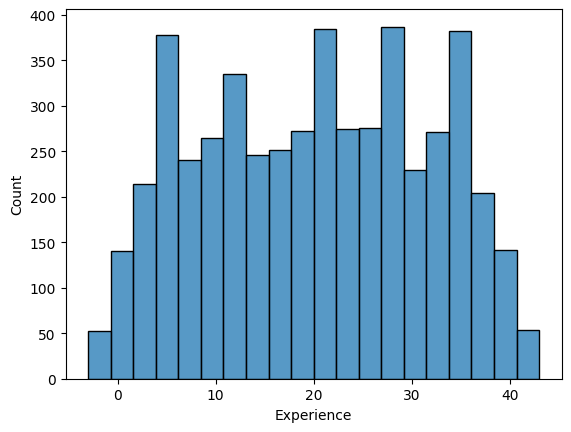

In [ ]:
sns.histplot(data = df, x='Experience')
plt.show()

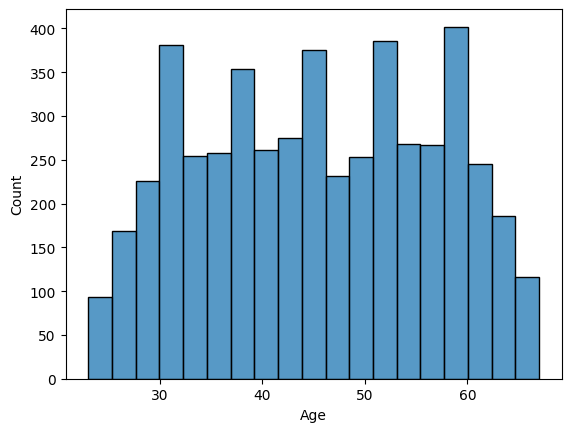

In [ ]:
sns.histplot(data = df, x='Age')
plt.show()

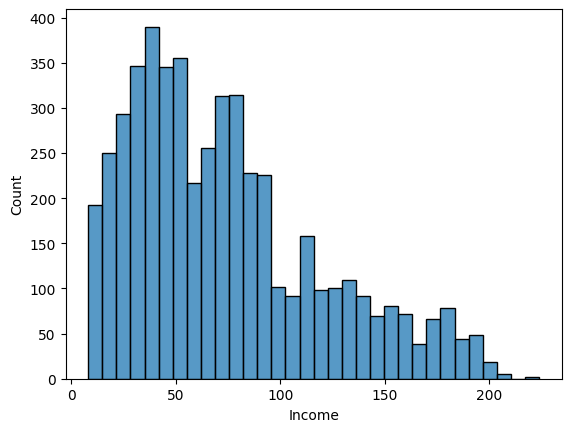

In [ ]:
sns.histplot(data = df, x='Income')
plt.show()

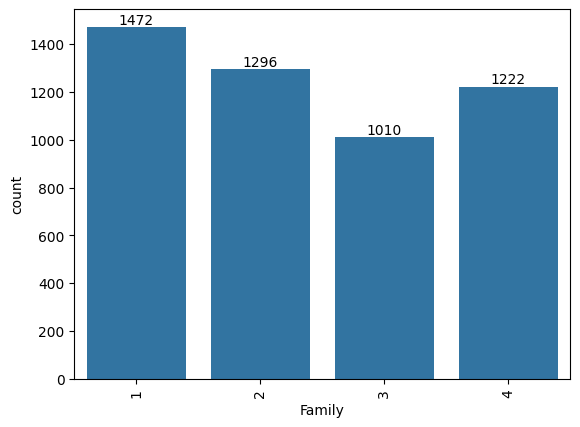

In [ ]:
ax2 = sns.countplot(data=df, x='Family')
for i in ax2.containers:
    ax2.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

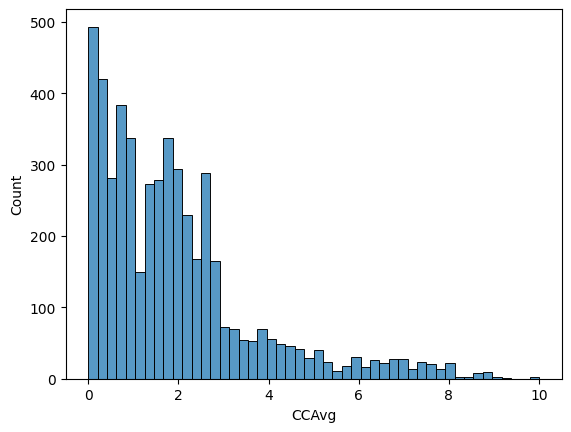

In [ ]:
sns.histplot(data = df, x='CCAvg')
plt.show()

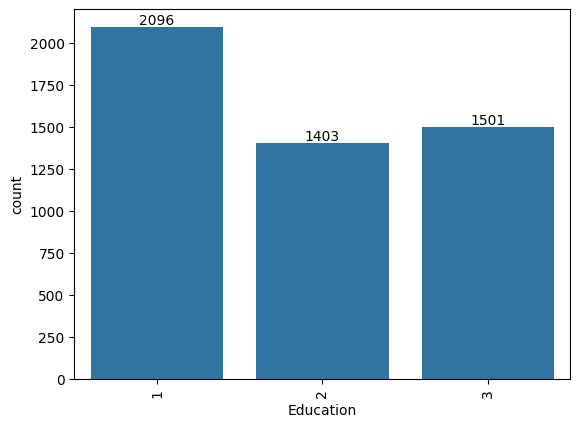

In [ ]:
ax1 = sns.countplot(data=df, x='Education')
for i in ax1.containers:
    ax1.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

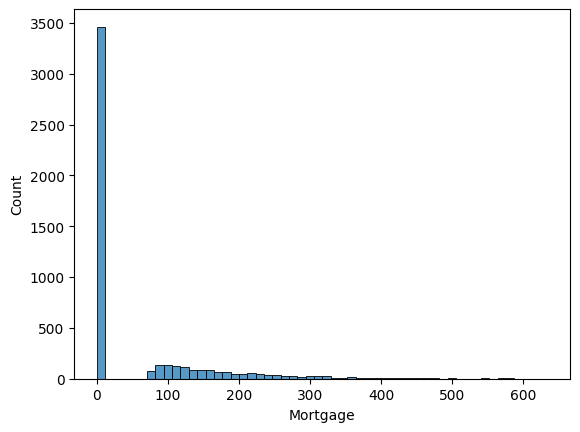

In [ ]:
sns.histplot(data = df, x='Mortgage')
plt.show()

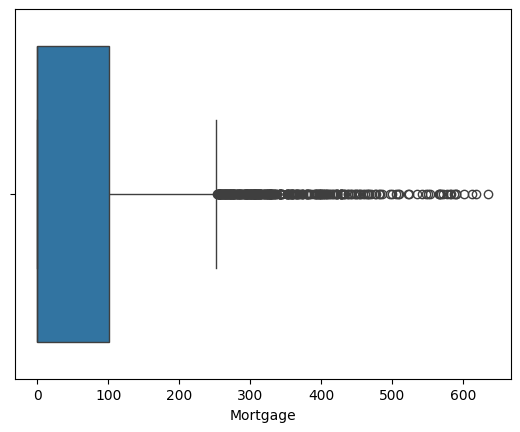

In [ ]:
sns.boxplot(data = df, x='Mortgage')
plt.show()

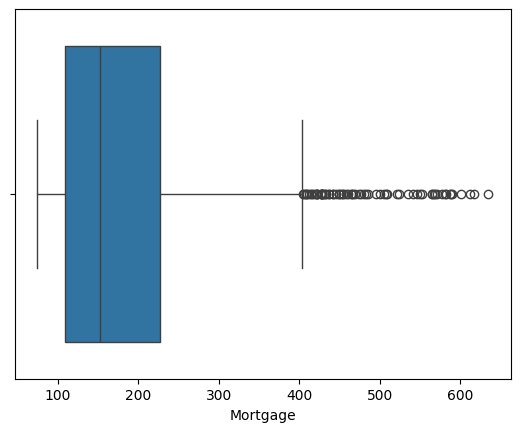

In [ ]:
df_pays_mortgage = df[df['Mortgage'] > 0]
sns.boxplot(data = df_pays_mortgage, x='Mortgage')
plt.show()

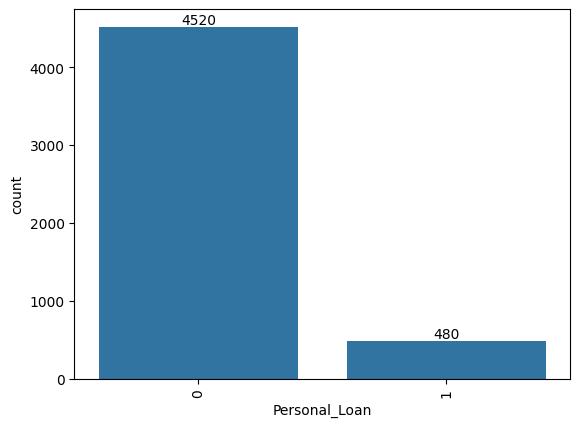

In [ ]:
ax3 = sns.countplot(data=df, x='Personal_Loan')
for i in ax3.containers:
    ax3.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

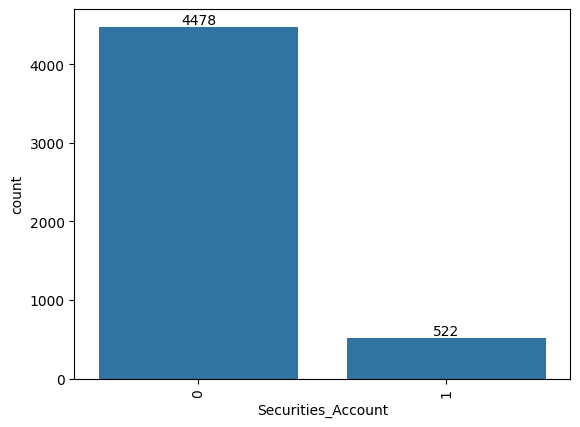

In [ ]:
ax5 = sns.countplot(data=df, x='Securities_Account')
for i in ax5.containers:
    ax5.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

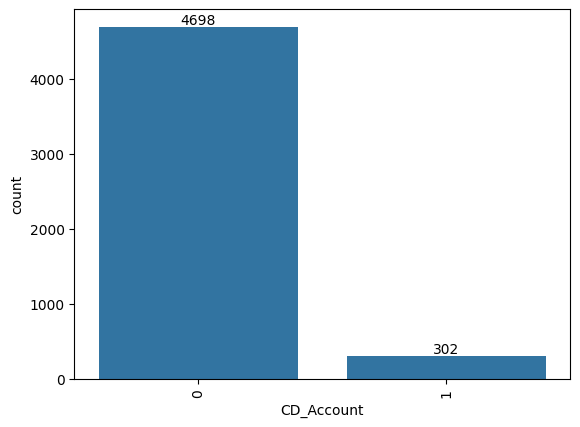

In [ ]:
ax6 = sns.countplot(data=df, x='CD_Account')
for i in ax6.containers:
    ax6.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

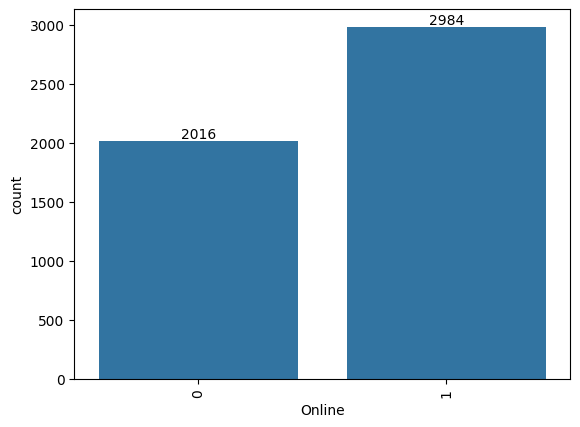

In [ ]:
ax6 = sns.countplot(data=df, x='Online')
for i in ax6.containers:
    ax6.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

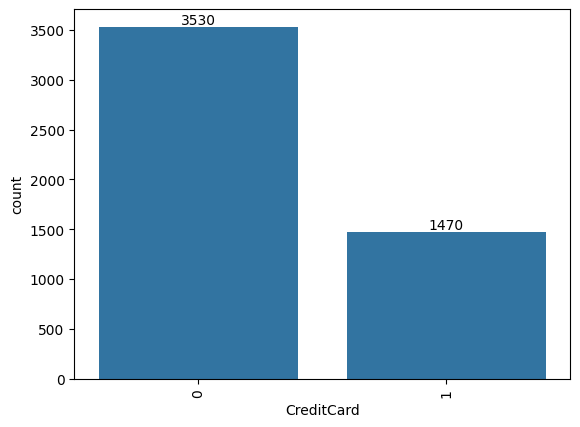

In [ ]:
ax7 = sns.countplot(data=df, x='CreditCard')
for i in ax7.containers:
    ax7.bar_label(i,)
plt.xticks(rotation=90)
plt.show()

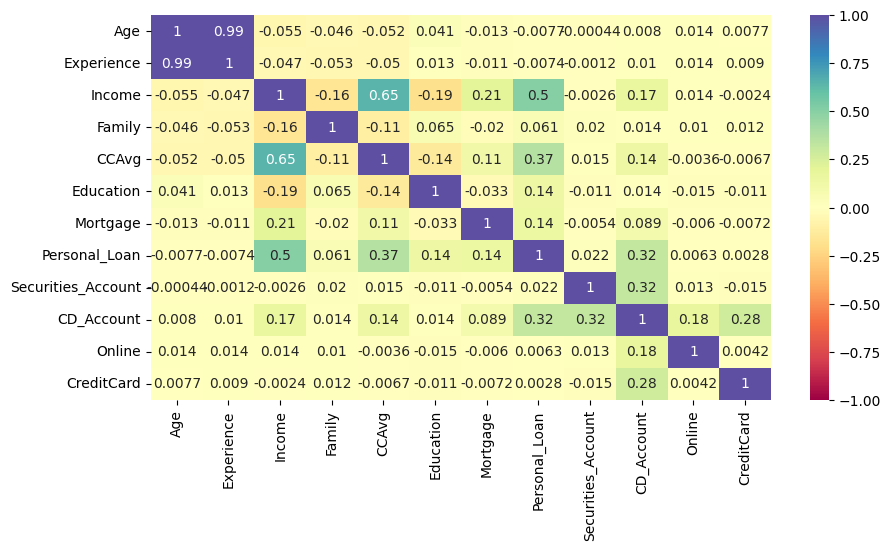

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Age','Experience','Income','Family','CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']].corr(), annot=True, cmap='Spectral', vmin=-1,vmax=1)
plt.show()

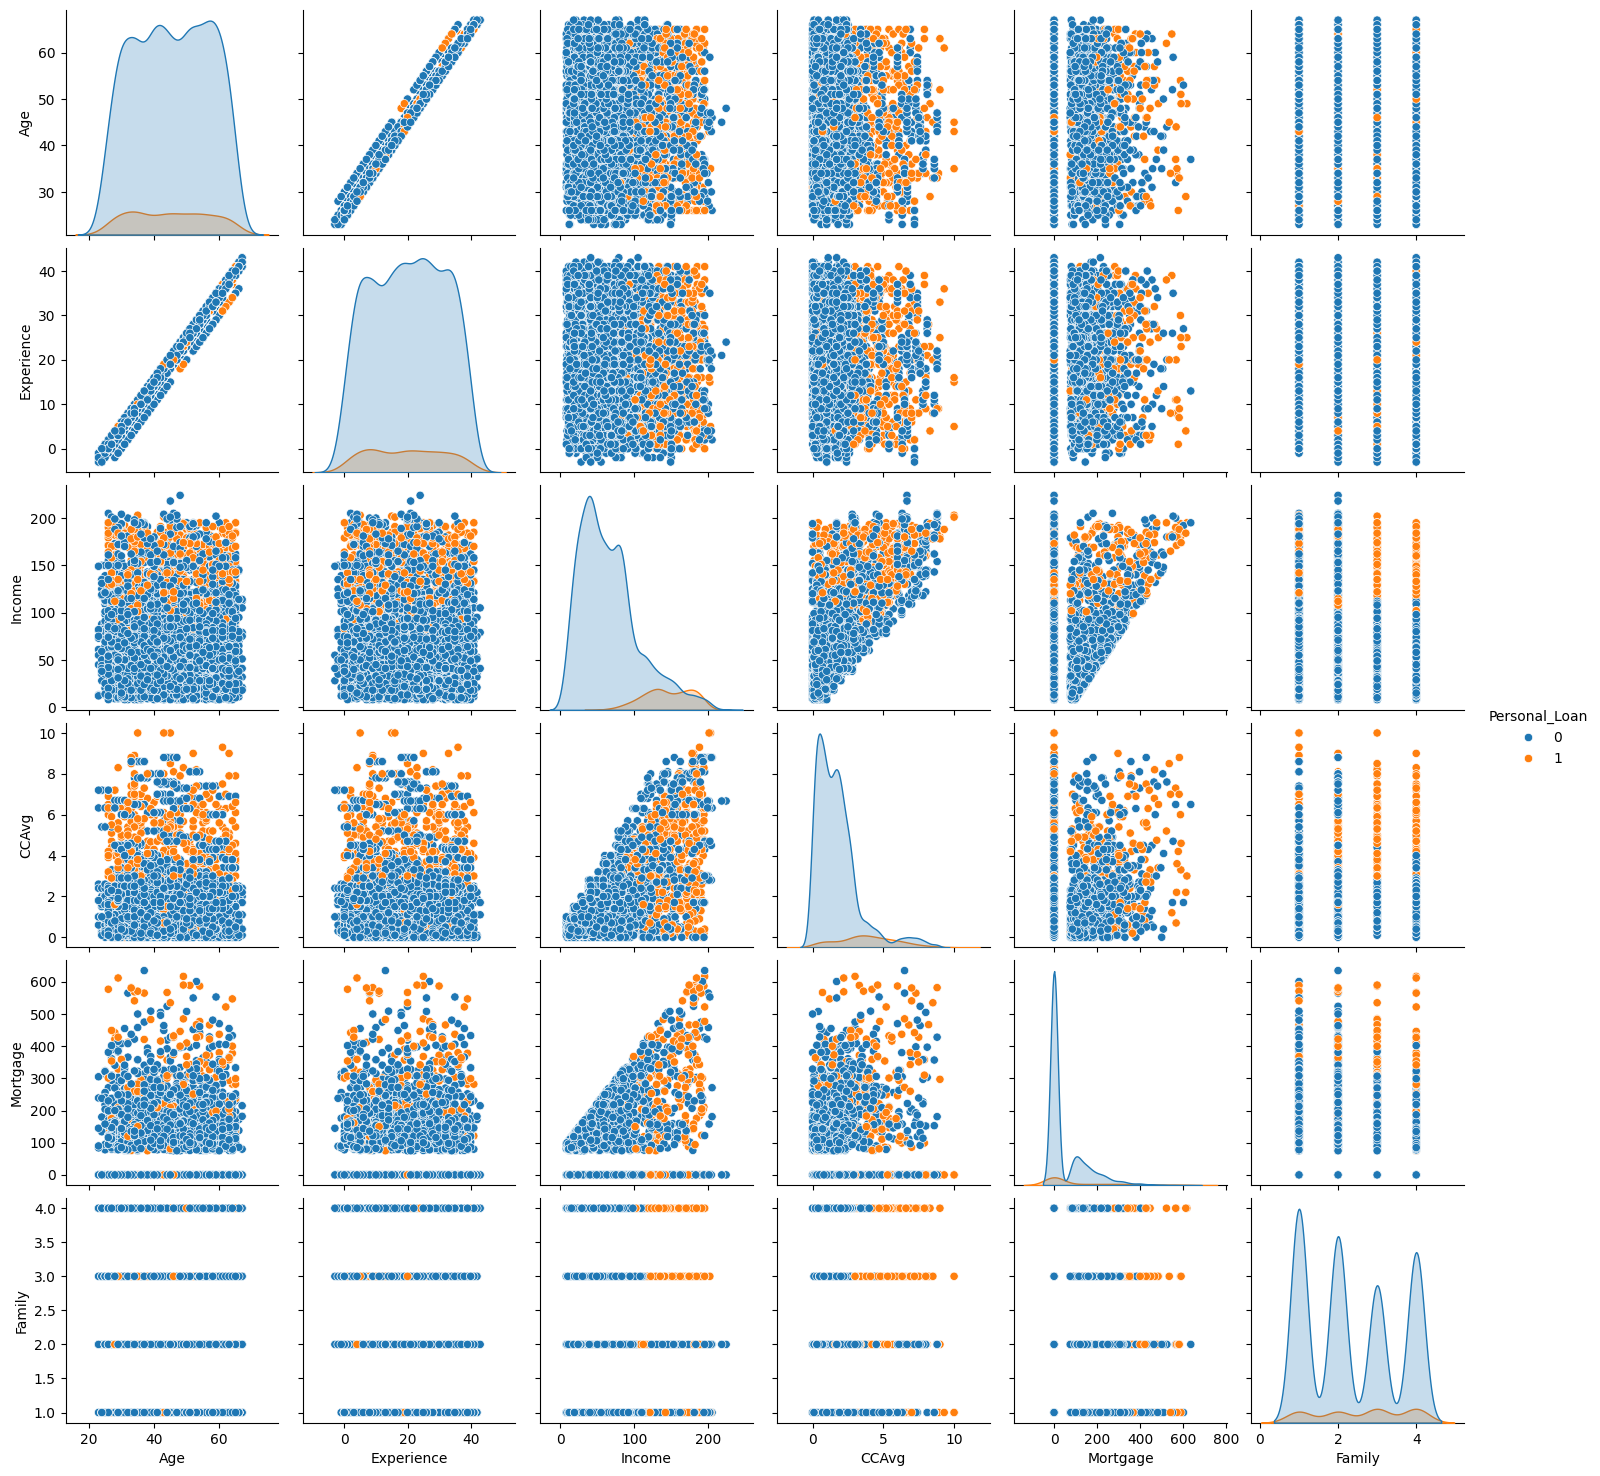

In [ ]:
sns.pairplot(data=df, vars=num_features, hue='Personal_Loan', diag_kind='kde')

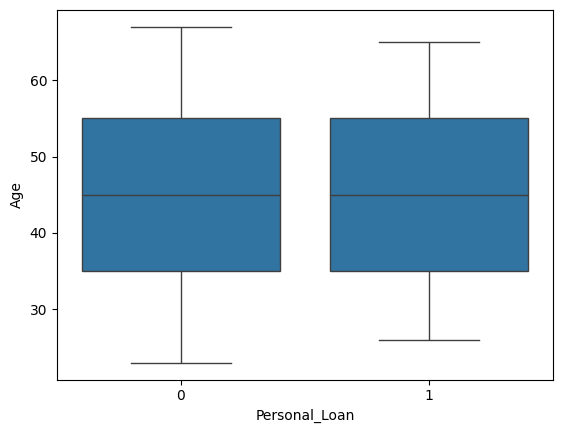

In [ ]:
sns.boxplot(data=df,x='Personal_Loan',y='Age')
plt.show()

In [ ]:
df_edu_pl = (df
      .groupby("Personal_Loan")["Education"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())

df_edu_pl


Education,1,2,3
Personal_Loan,,,
0,44.31,27.01,28.67
1,19.38,37.92,42.71


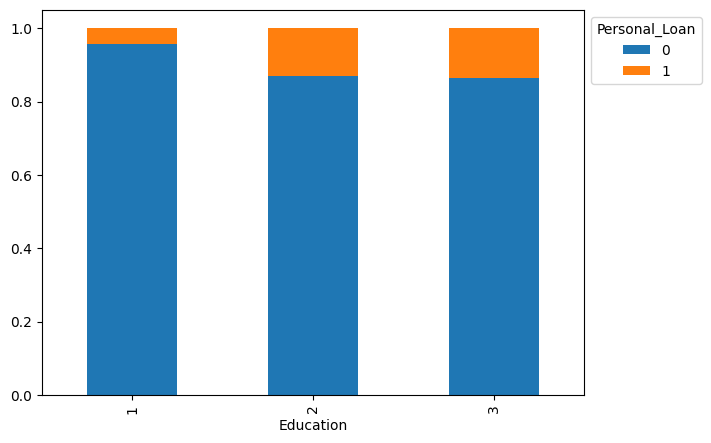

In [ ]:
tab = pd.crosstab(
    df['Education'],
    df['Personal_Loan'],
    normalize='index'
).sort_values(by=0, ascending=False)

tab.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('Education')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan');

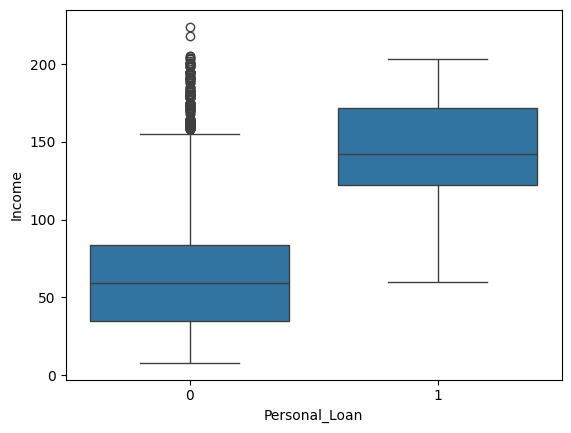

In [ ]:
sns.boxplot(data=df,x='Personal_Loan',y='Income')
plt.show()

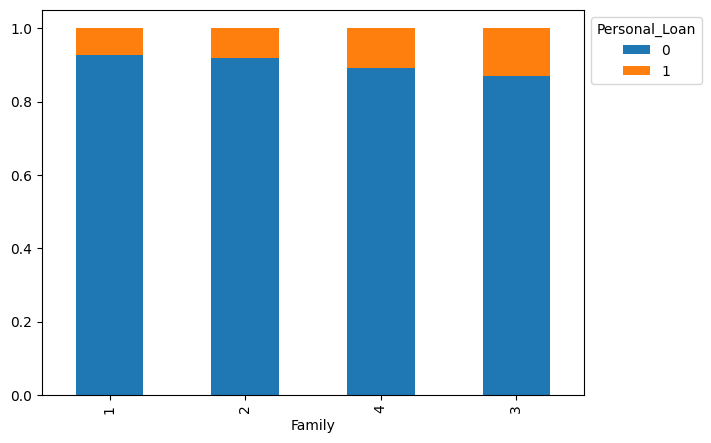

In [ ]:
tab2 = pd.crosstab(
    df['Family'],
    df['Personal_Loan'],
    normalize='index'
).sort_values(by=0, ascending=False)

tab2.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('Family')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Personal_Loan');

## Data Preprocessing

* Missing value treatment

In [ ]:
# Check for null values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


* Feature engineering

In [ ]:
# Add variable to define if customers have mortgage or not because the numerical varible has many zeros. Otherwise, most mortgages above zeros would be considered outliers.
df['Mortgage_dummy'] = np.where(df['Mortgage'] == 0, 0, 1)
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_dummy
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0


In [ ]:
# Create dummy variables for categorical variable that is not coded as 1 or 0 - Education
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

df = df.join(pd.DataFrame(encoder.fit_transform(df[['Education']]).toarray(), columns=encoder.get_feature_names_out(['Education'])))
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_dummy,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0,1.0,0.0,0.0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0,1.0,0.0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0,0.0,1.0,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,1,0.0,1.0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0,0.0,1.0,0.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,0,0.0,0.0,1.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,1,0.0,1.0,0.0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0,0.0,0.0,1.0


* Preparing data for modeling

In [ ]:
# Define categorical and numerical variables
num_features = ['Age','Experience','Income','CCAvg', 'Mortgage', 'Family']
cat_features = ['Securities_Account','CD_Account','Online', 'CreditCard', 'Mortgage_dummy', 'Education_1', 'Education_2', 'Education_3']

# Define independent and dependent variables
X = df[num_features + cat_features]
y = df['Personal_Loan']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data in 80/20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=12)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)
print("Percentage of classes in training set:")
print(100*y_train.value_counts(normalize=True), '\n')
print("Percentage of classes in test set:")
print(100*y_test.value_counts(normalize=True), '\n')

Shape of training set: (4000, 14)
Shape of test set: (1000, 14)
Percentage of classes in training set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 

Percentage of classes in test set:
Personal_Loan
0    90.4
1     9.6
Name: proportion, dtype: float64 



## Model Building

### Model Evaluation Criterion

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

def model_performance_classification(model, predictors, target):
  pred = model.predict(predictors)
  acc = accuracy_score(target, pred)
  recall = recall_score(target, pred)
  precision = precision_score(target, pred)
  f1 = f1_score(target, pred)
  df_perf = pd.DataFrame(
    {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
    index=[0],
)
  return df_perf

In [ ]:
from sklearn import metrics

def plot_confusion_matrix(model, predictors, target):

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.array(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2, 2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")


### Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dtree1 = DecisionTreeClassifier(random_state=12)

# Fitting the model to the training data
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12)

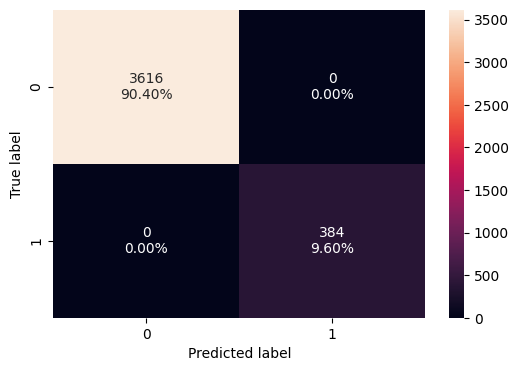

In [ ]:
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
dtree1_train_perf = model_performance_classification(dtree1, X_train, y_train)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


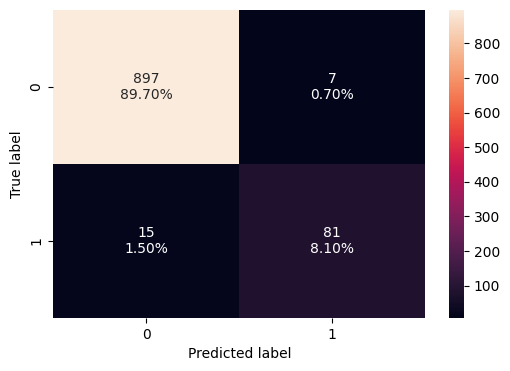

In [ ]:
plot_confusion_matrix(dtree1, X_test, y_test)

In [ ]:
dtree1_test_perf = model_performance_classification(dtree1, X_test, y_test)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.978,0.84375,0.920455,0.880435


<function matplotlib.pyplot.show(close=None, block=None)>

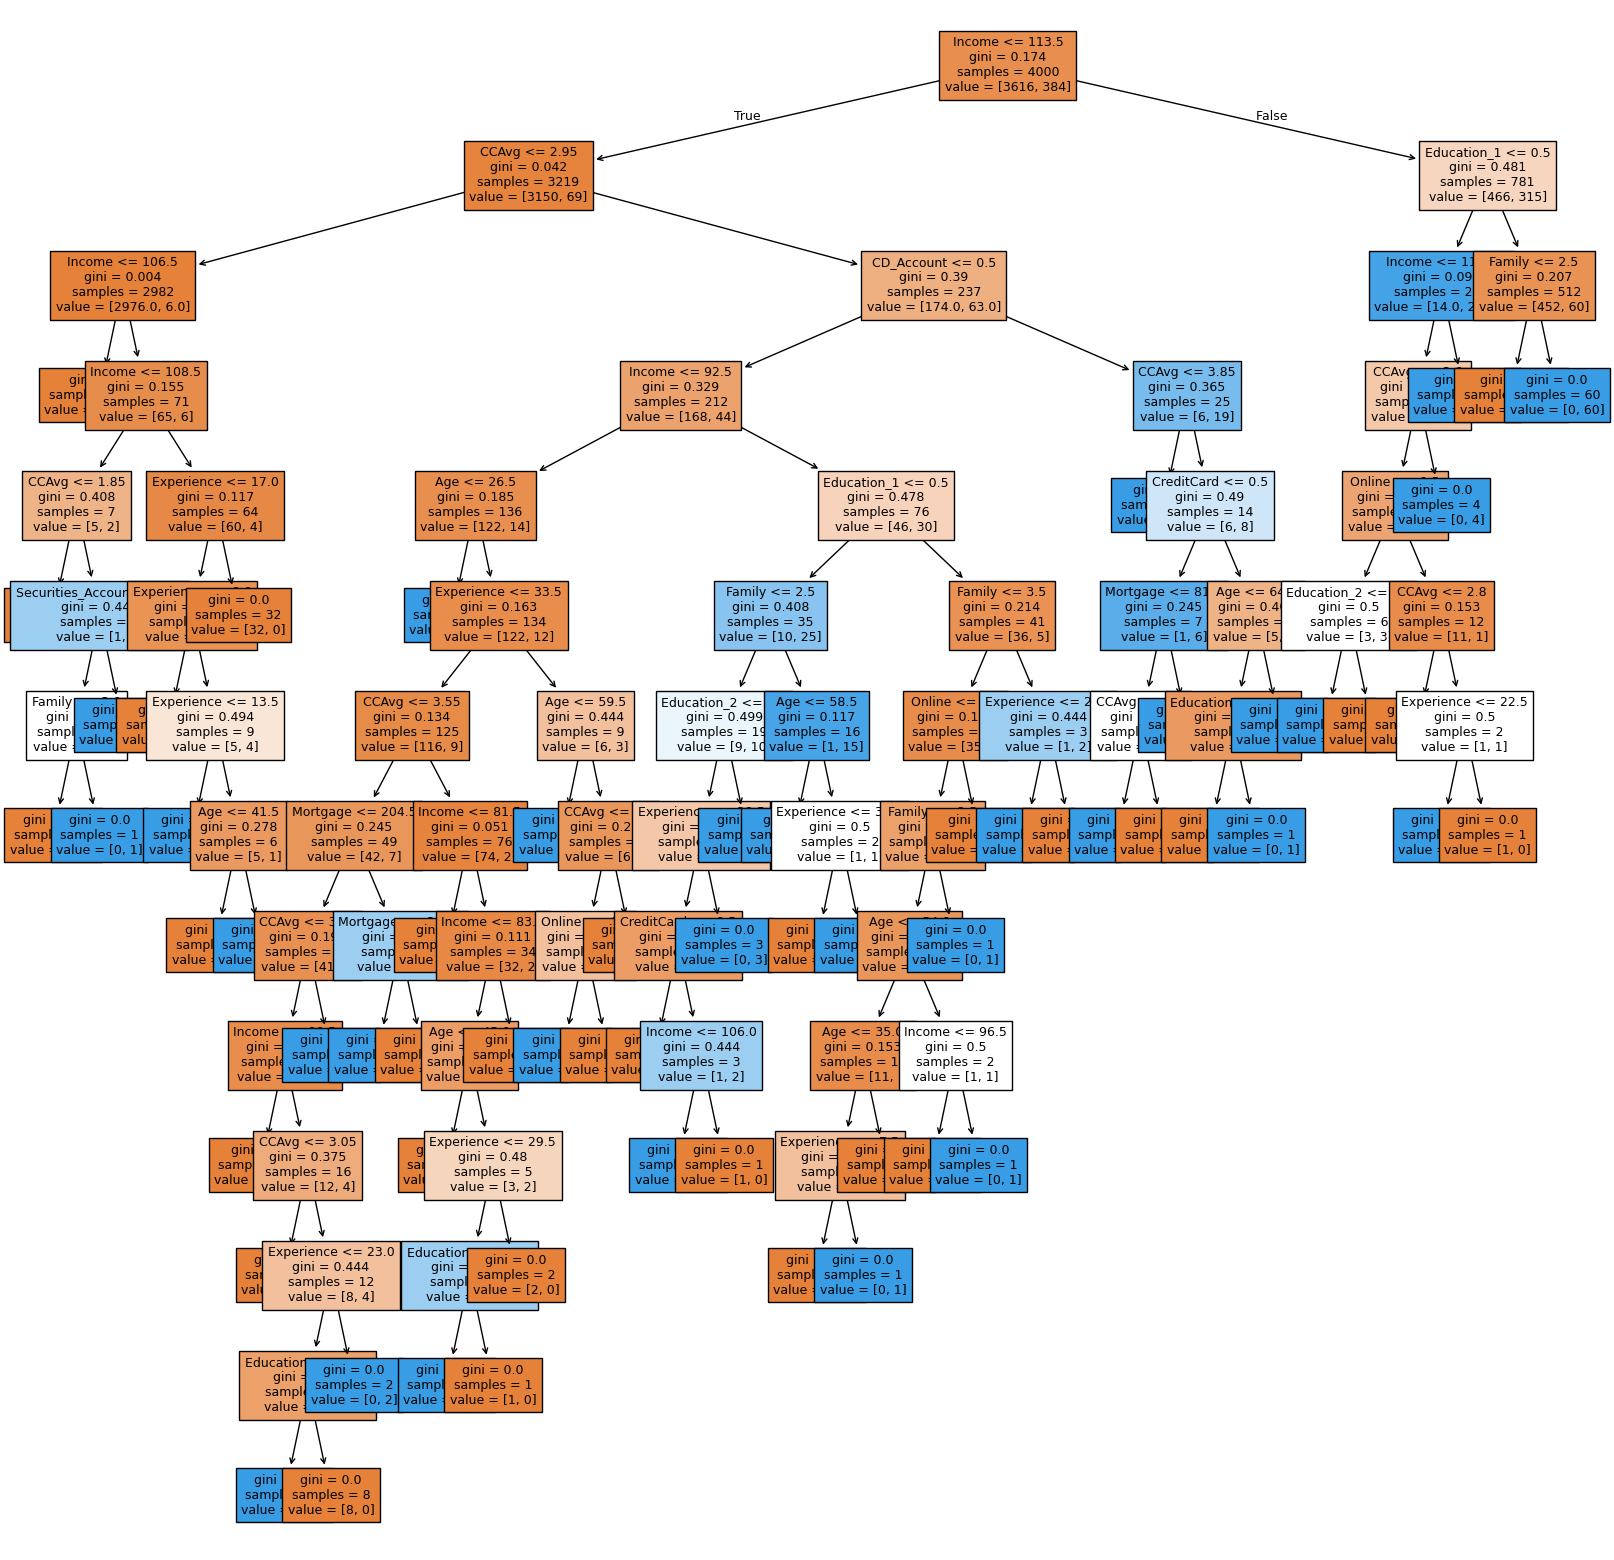

In [ ]:
from sklearn import tree

# Get a list of features
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# Add arrows to the decision tree
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show

In [ ]:
# Printing text version
print(
    tree.export_text(
        dtree1,
        feature_names=feature_names,
        show_weights=True
    )
)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2911.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Income <= 108.50
|   |   |   |   |--- CCAvg <= 1.85
|   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |--- CCAvg >  1.85
|   |   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |   |--- Family <= 3.00
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Income >  108.50
|   |   |   |   |--- Experience <= 17.00
|   |   |   |   |   |--- Experience <= 8.00
|   |   |   |   |   |   |--- weights: [23.00, 0.00] class: 0
|   |   |   |   |   |--- Experience >  8.00
|   |   |   |   |   |   |--- Experience <= 13.50
|   |   |   |   |   |   |   |--

###The model is complex and overfitting the training set. Therefore, there is a considerable gap in performance when the test set is predicted.

## Model Performance Improvement

###Pre-Prunning

In [ ]:
from sklearn.model_selection import GridSearchCV

scoring = 'f1_score'

# Defining the parameters of the model
params = {'max_depth': np.arange(2,10,1),
          'max_leaf_nodes': np.arange(10,51,10),
          'min_samples_split': np.arange(10,51,10),
         }


gs = GridSearchCV(dtree1, param_grid=params, cv=5)

gs.fit(X_train, y_train)
print(gs.best_params_)
print('Best parameters:', gs.best_params_,
      '\nValidation %s: %.6f +/- %.6f' % (scoring, gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_]),
      '\n      Test %s: %.6f\n' % (scoring, gs.best_estimator_.score(X_test,y_test)))

dtree2 = gs.best_estimator_    # This is the FINAL model (already retrained by GridSearchCV)


{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 30}
Best parameters: {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 30} 
Validation f1_score: 0.984750 +/- 0.004569 
      Test f1_score: 0.982000



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


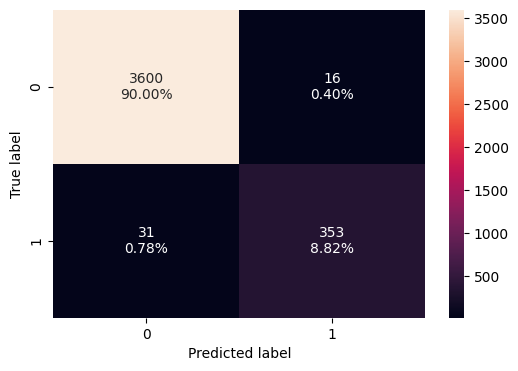

In [ ]:
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
dtree2_train_perf = model_performance_classification(dtree2, X_train, y_train)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.98825,0.919271,0.95664,0.937583


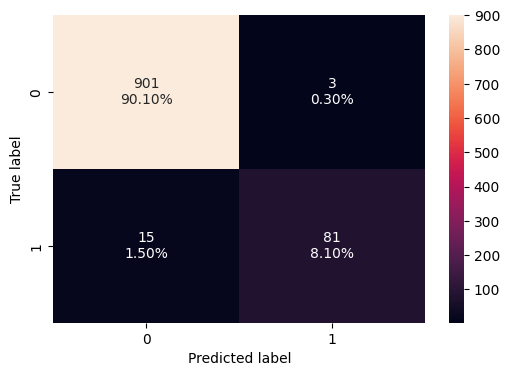

In [ ]:
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
dtree2_test_perf = model_performance_classification(dtree2, X_test, y_test)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.982,0.84375,0.964286,0.9


<function matplotlib.pyplot.show(close=None, block=None)>

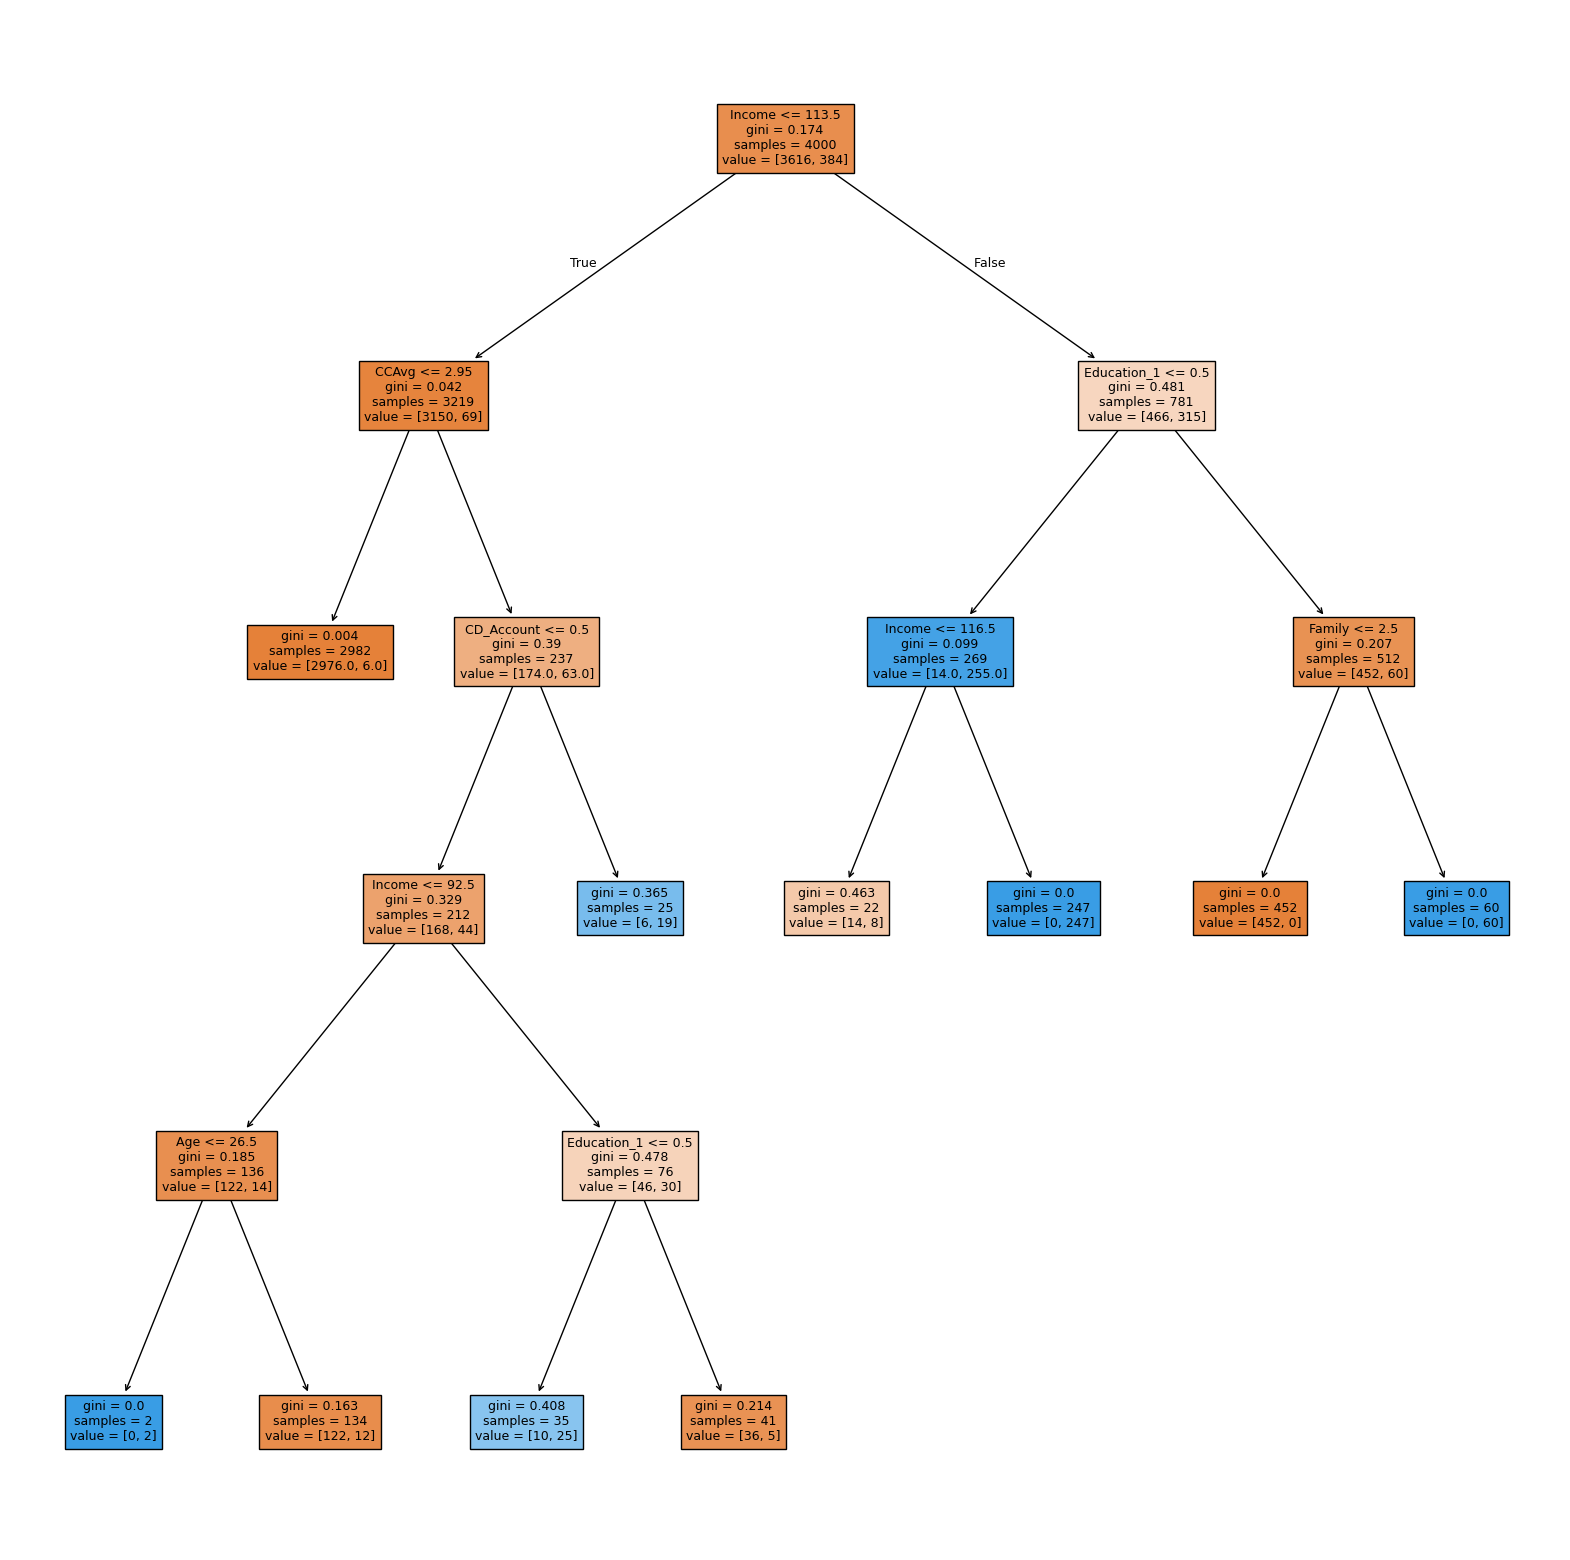

In [ ]:
# Get a list of features
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    dtree2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# Add arrows to the decision tree
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show

###Post-Prunning

In [ ]:
# Create Decision Tree
clf = DecisionTreeClassifier(random_state=12)

# Compute the cost of complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000167,0.000333
2,0.000195,0.001307
3,0.000214,0.001736
4,0.000214,0.002593
5,0.000214,0.003021
6,0.000229,0.003480
7,0.000234,0.003948
8,0.000262,0.004473
9,0.000333,0.004806


Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training Set')

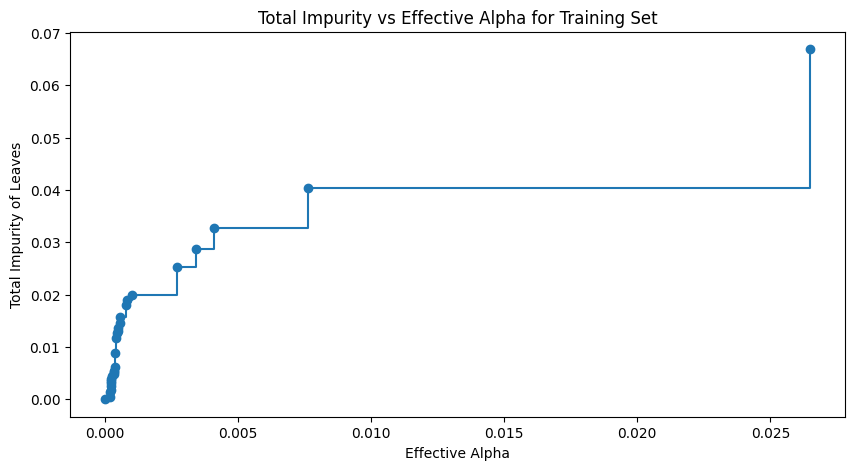

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

# Plot total impurities vs. effective alphas, excluding the last value, using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")


In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(ccp_alpha= ccp_alpha, random_state=12)

  clf.fit(X_train, y_train)
  clfs.append(clf)

print("Number of nodes in the last tree is {} with ccp_alpha {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1])

)


Number of nodes in the last tree is 1 with ccp_alpha 0.05334372632255218


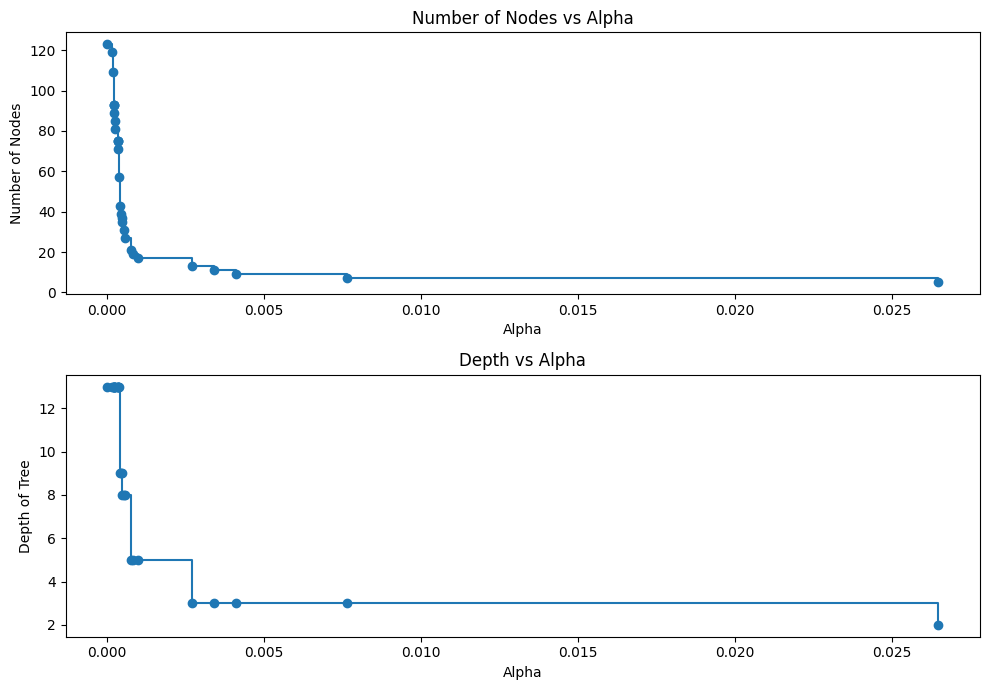

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Adjust node count
node_counts = [clf.tree_.node_count for clf in clfs]

# Adjust max depth
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1, figsize=(10, 7))

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")

fig.tight_layout()


In [ ]:
train_f1_scores = []

for clf in clfs:
  pred_train = clf.predict(X_train)
  f1_train = f1_score(y_train, pred_train)
  train_f1_scores.append(f1_train)

In [ ]:
test_f1_scores = []

for clf in clfs:
  pred_test = clf.predict(X_test)
  f1_test = f1_score(y_test, pred_test)
  test_f1_scores.append(f1_test)

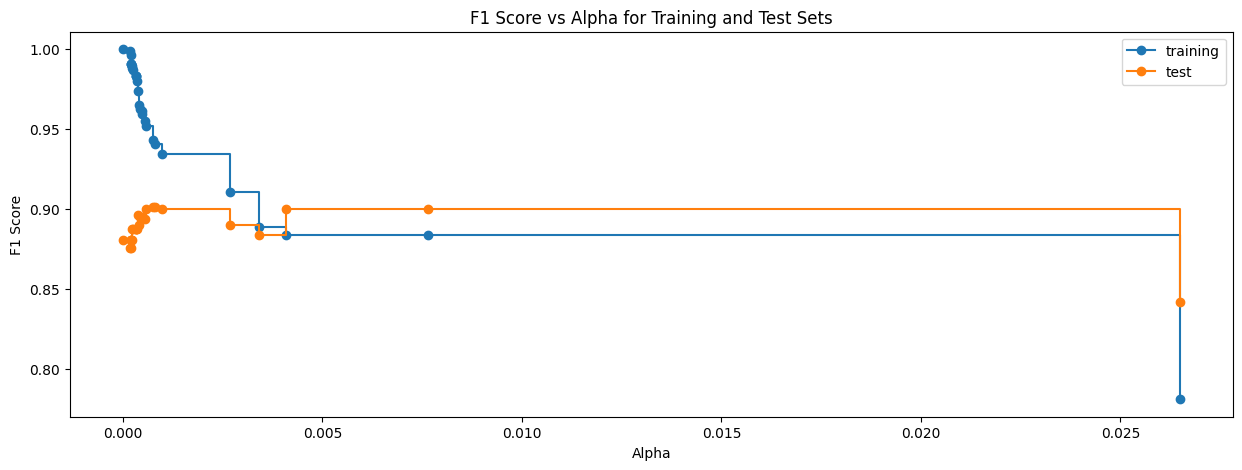

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs Alpha for Training and Test Sets")

ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend();

In [ ]:
# Creating the model with the highest test F1 Score based on Post-Pruning
index_best_model = np.argmax(test_f1_scores)

# Select the decision tree model with highest test F1 Score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=0.0007614989177489179, random_state=12)


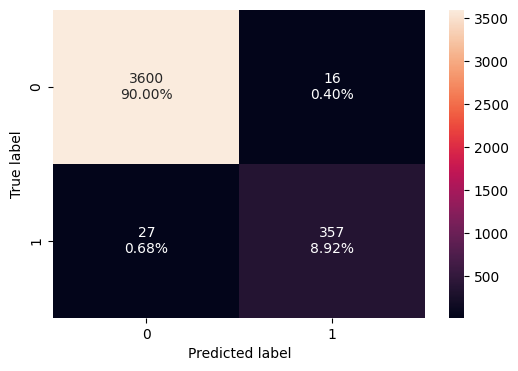

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf = model_performance_classification(dtree3, X_train, y_train)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.98925,0.929688,0.957105,0.943197


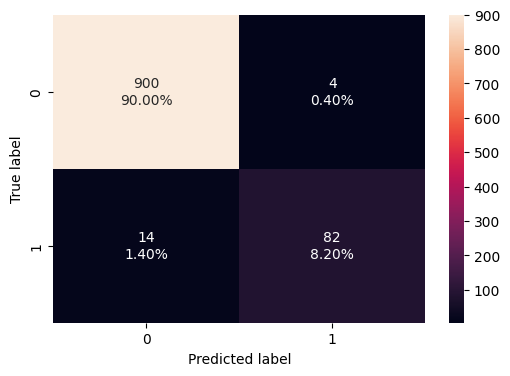

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf = model_performance_classification(dtree3, X_test, y_test)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.982,0.854167,0.953488,0.901099


<function matplotlib.pyplot.show(close=None, block=None)>

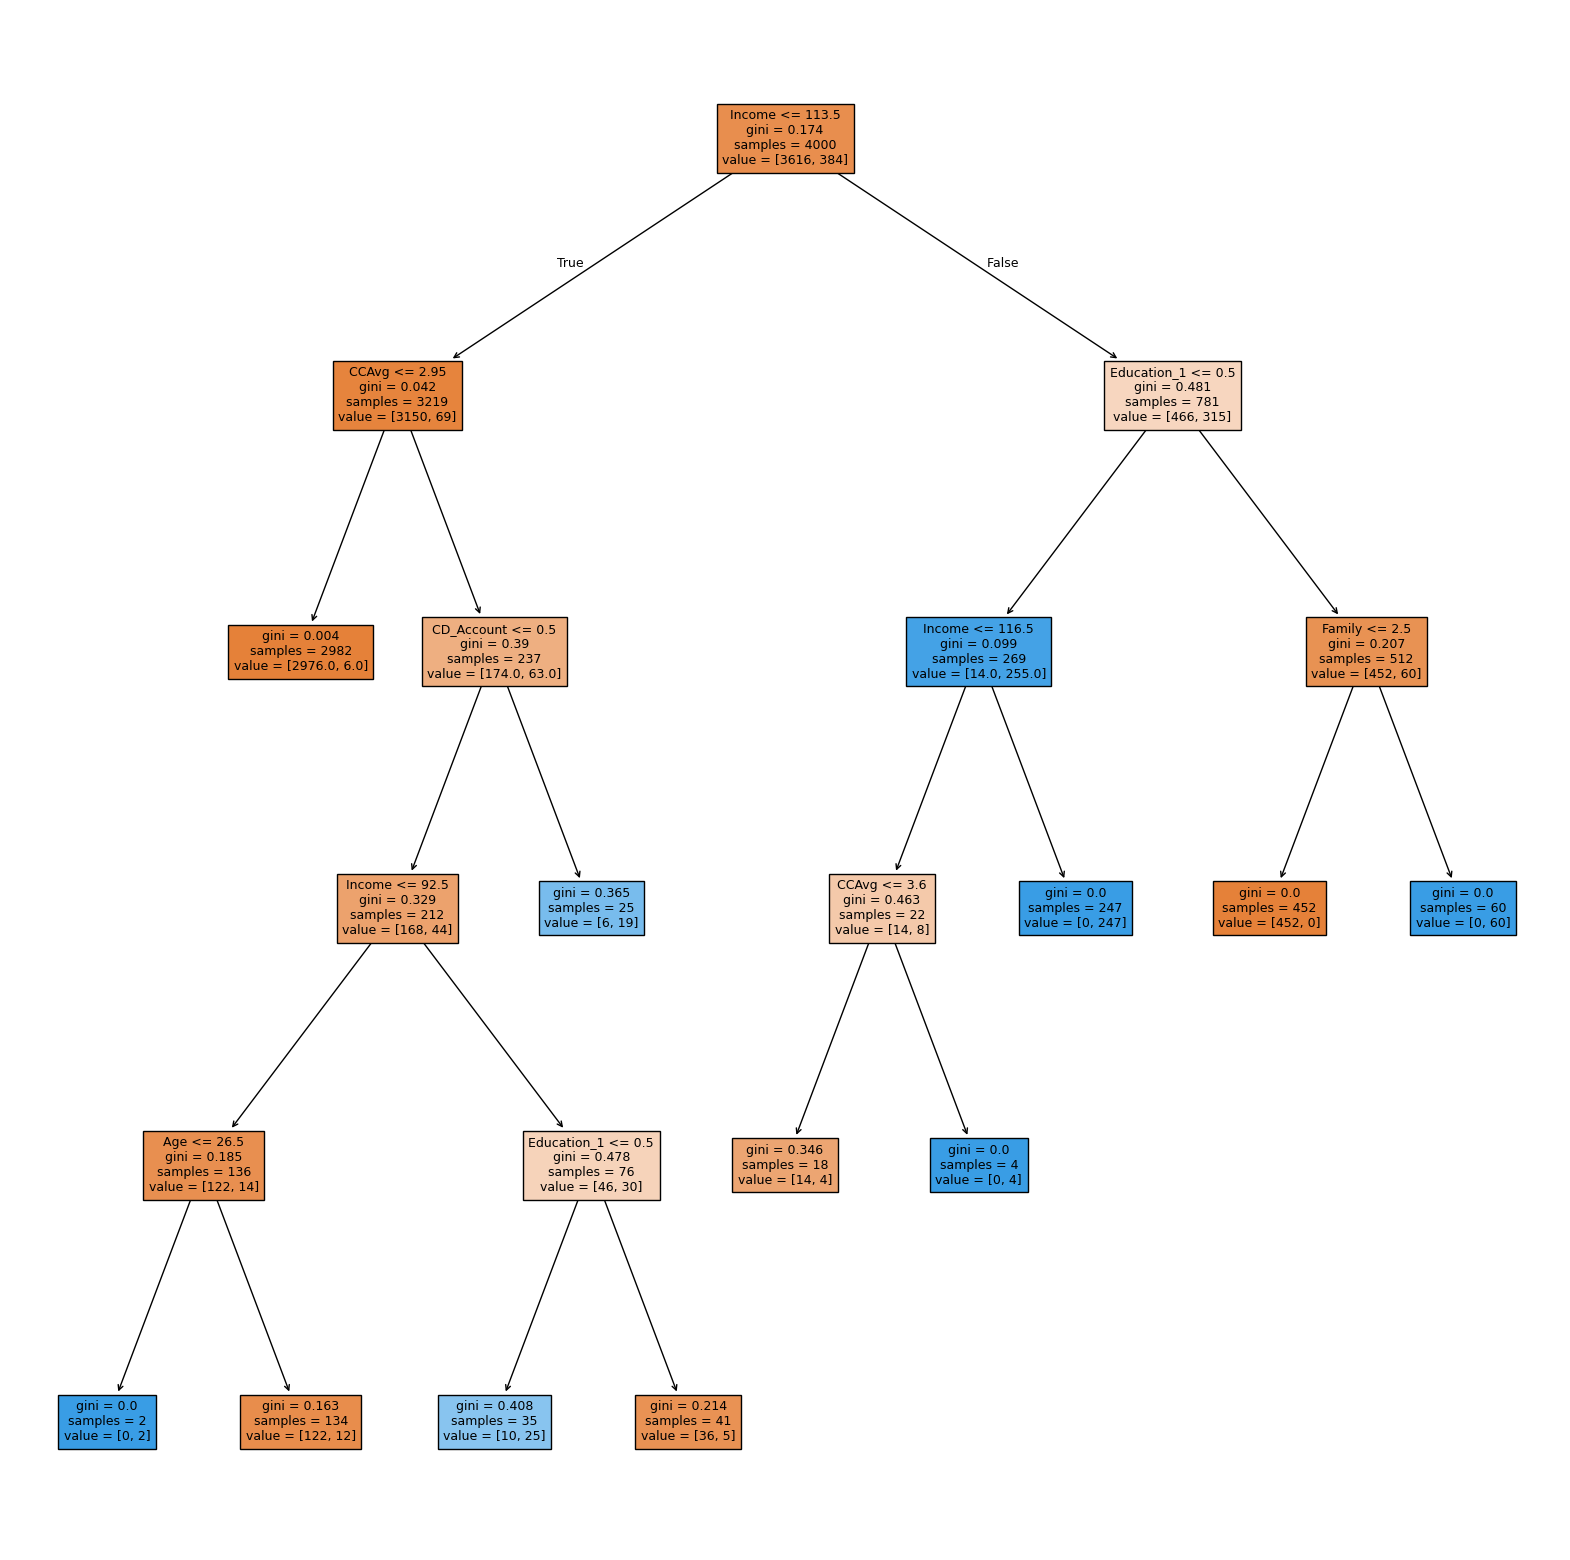

In [ ]:
# Get a list of features
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 20))

out = tree.plot_tree(
    dtree3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# Add arroes to the decision tree
for o in out:
  arrow = o.arrow_patch
  if arrow is not None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show

## Model Performance Comparison and Final Model Selection

In [ ]:
sets = ['train','test']


dtree1_perf = pd.concat([dtree1_train_perf,dtree1_test_perf])
dtree1_perf['Set'] = sets
dtree1_perf['Decision Tree'] = 'Base Model'
#dtree1_perf.set_index('Set')
dtree1_perf = dtree1_perf.loc[:,['Decision Tree','Set','Accuracy','Recall', 'Precision', 'F1']]

dtree2_perf = pd.concat([dtree2_train_perf,dtree2_test_perf])
dtree2_perf['Set'] = sets
dtree2_perf['Decision Tree'] = 'Pre-Pruning'
#dtree2_perf.set_index('Set')
dtree2_perf = dtree2_perf.loc[:,['Decision Tree','Set','Accuracy','Recall', 'Precision', 'F1']]

dtree3_perf = pd.concat([dtree3_train_perf,dtree3_test_perf])
dtree3_perf['Set'] = sets
dtree3_perf['Decision Tree'] = 'Post-Pruning'
#dtree3_perf.set_index('Set')
dtree3_perf = dtree3_perf.loc[:,['Decision Tree','Set','Accuracy','Recall', 'Precision', 'F1']]

pd.concat([dtree1_perf, dtree2_perf, dtree3_perf])

,Decision Tree,Set,Accuracy,Recall,Precision,F1
0,Base Model,train,1.00000,1.000000,1.000000,1.000000
0,Base Model,test,0.97800,0.843750,0.920455,0.880435
0,Pre-Pruning,train,0.98825,0.919271,0.956640,0.937583
0,Pre-Pruning,test,0.98200,0.843750,0.964286,0.900000
0,Post-Pruning,train,0.98925,0.929688,0.957105,0.943197
0,Post-Pruning,test,0.98200,0.854167,0.953488,0.901099


### The Base Model has a considerable performance gap between test and training sets. This means that the Base Model is overfitting.
### Both Pre-Prunning and Post-Pruning performed similarly.
### **F1-Score:** Post-Pruning has a slightly higher F1 scores for both training and test sets.
### **Recall:** Post-Pruning has a higher Recall for both training and test sets.
### **Precision:** Pre-Pruning has a higher Precision for the test set, whereas Post-Pruning has a higher Precision for the training set.
### **Accuracy:** Post-Pruning has a slightly higher Accuracy for the training set, whereas both Pre-Prunning and Post-Pruning have the same Accuracy for the test set.

### Considering the scores above, the **Post-Pruning model should be selected**. It not only outperforms Pre-Pruning in F1-Score, but also performs better in terms of Recall. For this analysis, **Recall is also important because the objective of marketing should be finding more customers that can potentially purchase the loan, even if it means reaching out to customers that are not interested in purchasing it (false positives).**

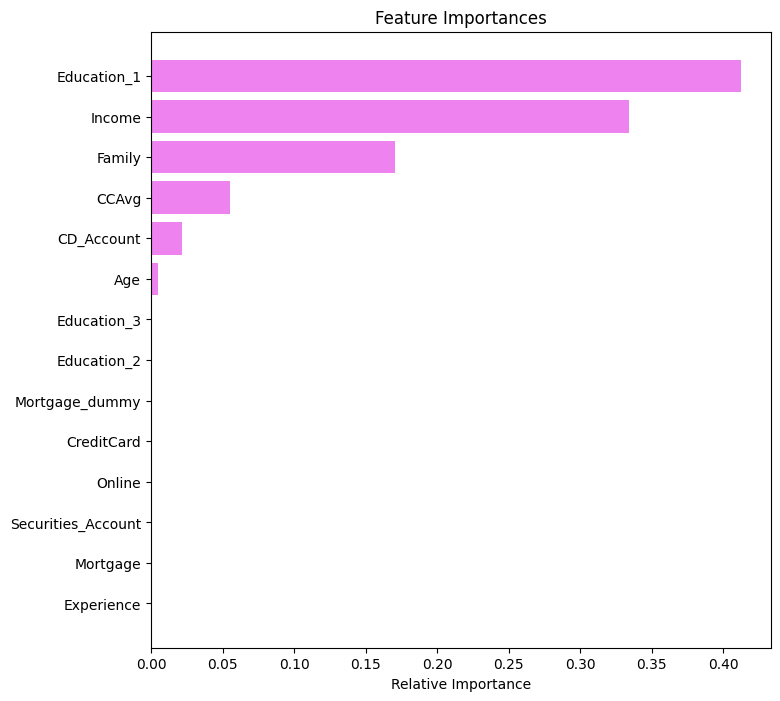

In [ ]:
# Feature importance
importances = dtree3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Business Recommendations


###What recommedations would you suggest to the bank?


###- It is recommended for the bank to use Post-Pruning model because it outperforms Pre-Pruning in most performance metrics, including Recall. This metric is important because the objective of marketing should be finding more customers that can potentially purchase the loan, even if it means reaching out to customers that are not interested in purchasing it (false positives).

###- The company should ensure customers' information are up-to-date in its database. It should prioritize Education, Income, and Family because these variables are the most important predictors for the selected model.  

###- If the company decides to reach customers outside their current database, it could also invest in media that focus on demographic groups with high-income, highly educated, and with 3 or more family members.

___